Import Libraries

In [6]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import csv
from sklearn import svm
import pandas as pd
import itertools
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


Define the constants and initial conditions

In [7]:
length = 1e-2                     # Length of the rod


# Material properties
rho = 2760.0                      # Density of AL380 (kg/m^3)
k = 1090                          # W/m-K
cp = 963.0                        # Specific heat of aluminum (J/kg-K)
alpha = k / (rho * cp)            # Thermal diffusivity
#print(alpha)
#L_fusion = 3.9e3                 # J/kg
L_fusion = 389e3               # J/kg


# Initial Conditions
T_L = 866.0                       #  K -Liquidus Temperature (593 c)
T_S = 811.0                       # K- Solidus Temperature (538 C)



# Spatial discretization


num_points = 50                  # Number of spatial points
dx = length / (num_points - 1)
print(dx)
                                   #dt = time_end/num_steps
#num_steps = 200000               # Number of time steps
                                  # num_steps = round(time_end/dt)
                                                              
# Time Discretization  
time_end = 48                 # seconds                         
num_steps = 10000
# dt = time_end/num_steps

dt = abs(0.5 *(dx**2/alpha))
num_steps = round(time_end/dt) +1
print('num_steps is',num_steps)
print('dt is ',dt)

cfl = 0.5 *(dx**2/alpha)
print('cfl is',cfl)
dt = time_end / num_steps
time_steps = np.linspace(0, time_end, num_steps + 1)

if dt <= cfl:
    print('stability criteria satisfied')
else:
    print('stability criteria not satisfied')
    sys.exit()

0.00020408163265306123
num_steps is 945268
dt is  5.0779300673648986e-05
cfl is 5.0779300673648986e-05
stability criteria satisfied


Defining the simulation field and initilisation of the temperatures

In [8]:
# Initial temperature and phase fields
temperature = np.full(num_points, 870.0)
phase = np.zeros(num_points)*1.0

# Set boundary conditions
temperature[-1] = 313.0 #(40 C)
phase[-1] = 1.0

temperature[0] = 313.0 #(40 C)
phase[0] = 1.0

# Store initial state in history
temperature_history = [temperature.copy()]
phi_history = [phase.copy()]

#print(temperature_history,phi_history)

Solving the heat transfer equation and phase change using numerical methods

In [9]:
# Finite difference method

for m in range(1, num_steps+1):                  # time loop
    for n in range(1,num_points-1):              # space loop, adjusted range
        print(f"Step {m}, point {n},Temperature: {temperature}, Phase: {phase}")
        if temperature[n] >= T_L:
            temperature[n] = temperature[n] + ((alpha * dt )/ dx**2) * (temperature[n+1] - 2.0 * temperature[n] + temperature[n-1])
            phase[n] = 0
         
            #print(m,n,temperature[n],phase[n])
        elif T_S < temperature[n] < T_L:
            temperature[n] = temperature[n] - (((k * dt) / (rho*(T_L-T_S)*(cp*(T_L-T_S)-L_fusion)*(dx**2))) * (temperature[n+1] - 2 * temperature[n] + temperature[n-1]))
            phase[n] = (T_L - temperature[n]) / (T_L - T_S)
        #print(m,n,temperature[n],phase[n])
         
        elif temperature[n]<T_S:
            temperature[n] = temperature[n] + ((alpha * dt )/ dx**2) * (temperature[n+1] - 2.0 * temperature[n] + temperature[n-1])
            phase[n] = 1
            
        else:
            print("ERROR: should not be here")
         
           # print(m,n,temperature[n],phase[n])
    
    temperature_history.append(temperature.copy())
    phi_history.append(phase.copy())
    #Print for debugging
    #print(f"Step {m}, space{n},Temperature: {temperature}, Phase: {phase}")


#print(temperature_history)
#print(phi_history)




Plot the Results

Temperature History Shape: (945269, 50)
Phi History Shape: (945269, 50)
Transposed Temperature History Shape: (945269, 50)
Transposed Phi History Shape: (945269, 50)


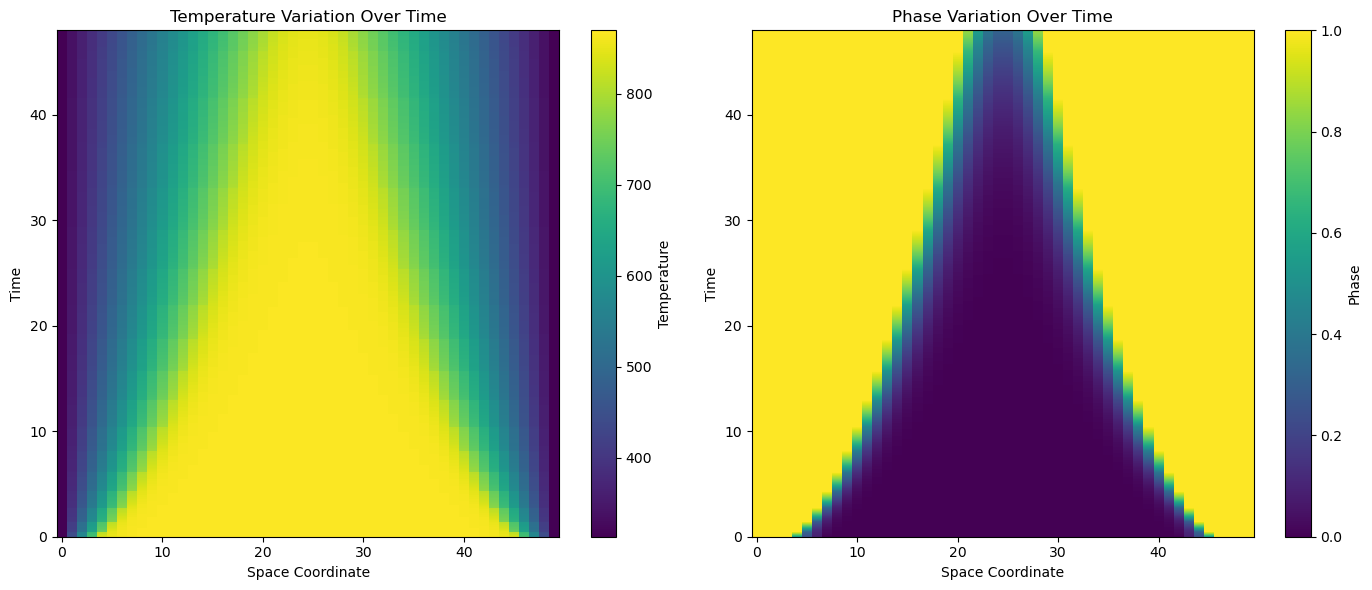

In [10]:
# Assuming you have temperature_history and phi_history as lists of arrays
temperature_history = np.array(temperature_history)
phi_history = np.array(phi_history)

# Check the shape of temperature_history and phi_history
print("Temperature History Shape:", temperature_history.shape)
print("Phi History Shape:", phi_history.shape)

# Assuming temperature_history and phi_history have dimensions (time, space)
# # If needed, transpose the arrays to match the expected dimensions of pcolormesh
# temperature_history = temperature_history.T
# phi_history = phi_history.T

# Check the new shape after transposing
print("Transposed Temperature History Shape:", temperature_history.shape)
print("Transposed Phi History Shape:", phi_history.shape)

# Create a meshgrid for space and time coordinates
space_coord, time_coord = np.meshgrid(np.arange(temperature_history.shape[1]), np.arange(temperature_history.shape[0]))

time_coord = time_coord * dt
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot the temperature history on the left subplot
im1 = ax1.pcolormesh(space_coord, time_coord, temperature_history, cmap='viridis')
ax1.set_xlabel('Space Coordinate')
ax1.set_ylabel('Time')
ax1.set_title('Temperature Variation Over Time')
fig.colorbar(im1, ax=ax1, label='Temperature')

# Plot the phase history on the right subplot
im2 = ax2.pcolormesh(space_coord, time_coord, phi_history, cmap='viridis')
ax2.set_xlabel('Space Coordinate')
ax2.set_ylabel('Time')
ax2.set_title('Phase Variation Over Time')
fig.colorbar(im2, ax=ax2, label='Phase')
plt.tight_layout()
plt.show()